# Inital Sources

Using the sources at 007.20321 +14.87119 and RA = 20:50:00.91, dec = -00:42:23.8 taken from the NASA/IPAC Infrared Science Archieve on 6/22/17.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table as tab

Read in the two data files. Currently, the *id's are in double format. This is different from the orginial table's long as .read() was having overflow errors

In [2]:
source_1 = tab.read('source1.tbl', format='ipac')  #In order for this to compile properly, these filenames will need to reflect
source_2 = tab.read('source2.tbl', format= 'ipac') #the directory of the user.

Picking out the relevant data into their own arrays to work with.

In [3]:
times_1 = source_1[0][:] #date expressed in juilian days
obs_mag_1 = source_1[1][:] #observed magnitude, auto corrected? correlated?
obs_mag_error_1 = source_1[2][:] #error on the observed magnitude

times_2 = source_2[0][:]
obs_mag_2 = source_2[1][:]
obs_mag_error_2 = source_2[2][:]


## Source 1

As each data file had multiple oid's present, I plotted both the raw file and also the individual sources on their own.

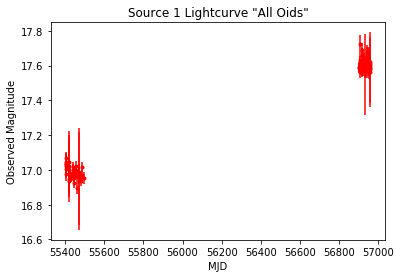

In [4]:
plt.errorbar(times_1, obs_mag_1, yerr = obs_mag_error_1, fmt = 'ro', markersize = 3)

plt.xlabel('MJD')
plt.ylabel('Observed Magnitude')
plt.title('Source 1 Lightcurve "All Oids"')

### Decomposed Oids

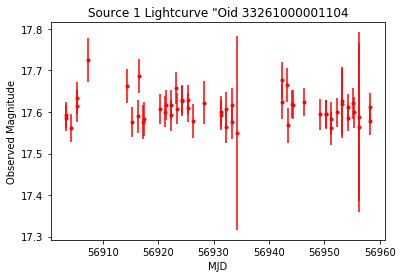

In [5]:
oid_11 = np.where(source_1[3][:] == 33261000001104)
plt.errorbar(times_1[oid_11], obs_mag_1[oid_11], yerr = obs_mag_error_1[oid_11], fmt = 'ro', markersize = 3)

plt.xlabel('MJD')
plt.ylabel('Observed Magnitude')
plt.title('Source 1 Lightcurve "Oid 33261000001104')

This oid doesnt seem to have an variability. And, given the plot above, it would seem that these are in fact distinct sources.

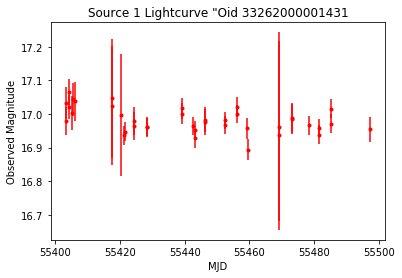

In [6]:
oid_12 = np.where(source_1[3][:] == 33262000001431)
plt.errorbar(times_1[oid_12], obs_mag_1[oid_12], yerr = obs_mag_error_1[oid_12], fmt = 'ro', markersize = 3)

plt.xlabel('MJD')
plt.ylabel('Observed Magnitude')
plt.title('Source 1 Lightcurve "Oid 33262000001431')

Again, this oid doesn't have any apparent variability.

## Source 2

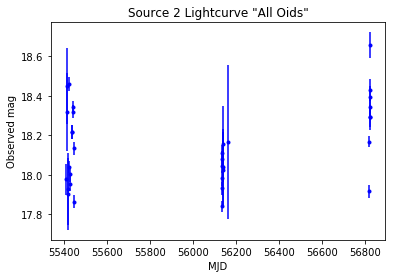

In [7]:
plt.errorbar(times_2, obs_mag_2, yerr = obs_mag_error_2, fmt = 'bo', markersize = 3)

plt.xlabel('MJD')
plt.ylabel('Observed mag')
plt.title('Source 2 Lightcurve "All Oids"')

### Decomposed Oids

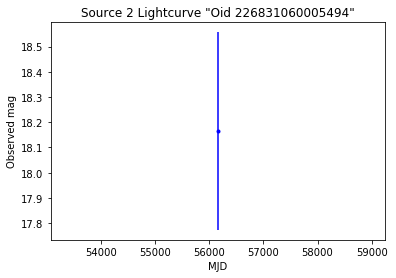

In [8]:
oid_21 = np.where(source_2[3][:] == 226831060005494)
plt.errorbar(times_2[oid_21], obs_mag_2[oid_21], yerr = obs_mag_error_2[oid_21], fmt = 'bo', markersize = 3)

plt.xlabel('MJD')
plt.ylabel('Observed mag')
plt.title('Source 2 Lightcurve "Oid 226831060005494"')

This is just a single point so it is likely to be some sort of outlier or misattributed source.

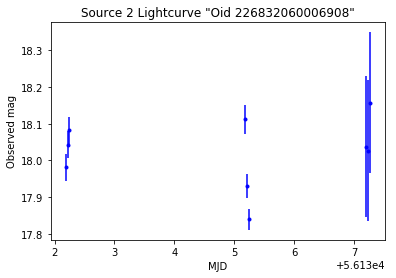

In [9]:
oid_22 = np.where(source_2[3][:] == 226832060006908)
plt.errorbar(times_2[oid_22], obs_mag_2[oid_22], yerr = obs_mag_error_2[oid_22], fmt = 'bo', markersize = 3)

plt.xlabel('MJD')
plt.ylabel('Observed mag')
plt.title('Source 2 Lightcurve "Oid 226832060006908"')

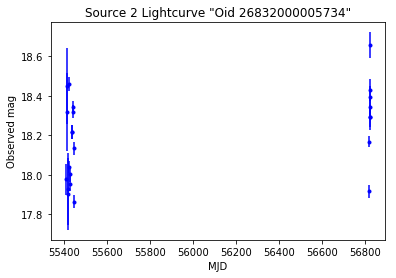

In [10]:
oid_23 = np.where(source_2[3][:] == 26832000005734)
plt.errorbar(times_2[oid_23], obs_mag_2[oid_23], yerr = obs_mag_error_2[oid_23], fmt = 'bo', markersize = 3)

plt.xlabel('MJD')
plt.ylabel('Observed mag')
plt.title('Source 2 Lightcurve "Oid 26832000005734"')

#### Folded Lightcurves
For oids 226832060006908 and 26832000005734

In [11]:
primary_period_1 = 0.191486 #taken from the NASA Exoplanet Archieve Periodogram Service
phase_21 = (times_2 % primary_period_1) / primary_period_1

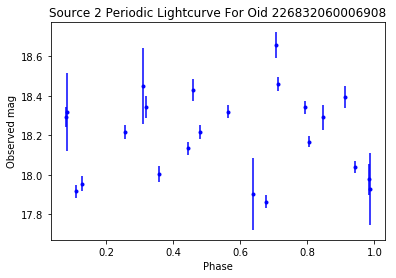

In [12]:
plt.errorbar(phase_21[oid_23], obs_mag_2[oid_23], yerr = obs_mag_error_2[oid_23], fmt = 'bo', markersize = 3)

plt.xlabel('Phase')
plt.ylabel('Observed mag')
plt.title('Source 2 Periodic Lightcurve For Oid 226832060006908')

There maybe some periodic variability here. A fit of a cosine might be able to reproduce this data. However, it apprears to be scattered fairly randomly.

In [13]:
primary_period_2 = 2.440220 
phase_22 = (times_2 % primary_period_2) / primary_period_2

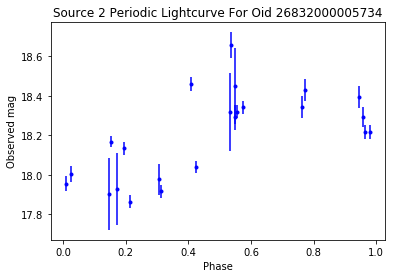

In [14]:
plt.errorbar(phase_22[oid_23], obs_mag_2[oid_23], yerr = obs_mag_error_2[oid_23], fmt = 'bo', markersize = 3)

plt.xlabel('Phase')
plt.ylabel('Observed mag')
plt.title('Source 2 Periodic Lightcurve For Oid 26832000005734')

This plot on the other hand has definite periodic character. Interestingly, it looks somewhat like the shape that the above plot was trying to form.

Given that this has a amplitude of 0.2 mag and a period of 2.44 days, this is likely are pulsating variable star. The amplitude of the variability is such that it wouldn't be an eruptive or cataclysmic star as these both have a sudden and drastic increase which then falls off over time. It also isn't a rotating variable because those have smaller changes in amplitude than are visible here. The fairly steady sinusoidal pattern seen here is not indictive of eclipsing binaries which have sudden drops. This leaves pulsating variables as the only remaining option. And indeed, the period and amplitude of the variations are coherent with those seen in many variable stars.